In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(10)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter

In [17]:
def load_data(string,path='../Datasets for Mid Sem Presentation/'):
    X = np.load(path+string+"_x.npy")
    y = np.load(path+string+"_y.npy")
    
    return X,y
        
    
def relative_cost(truth,pred):
    return np.mean(abs(pred-truth)/(1+truth))


def abs_error(truth,pred):
    return np.mean(abs(pred-truth))

In [3]:
test_x,test_y = load_data('test_data')
train_x,train_y = load_data("train_data_2")
v_x,v_y = load_data("val_data_2")

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_x)

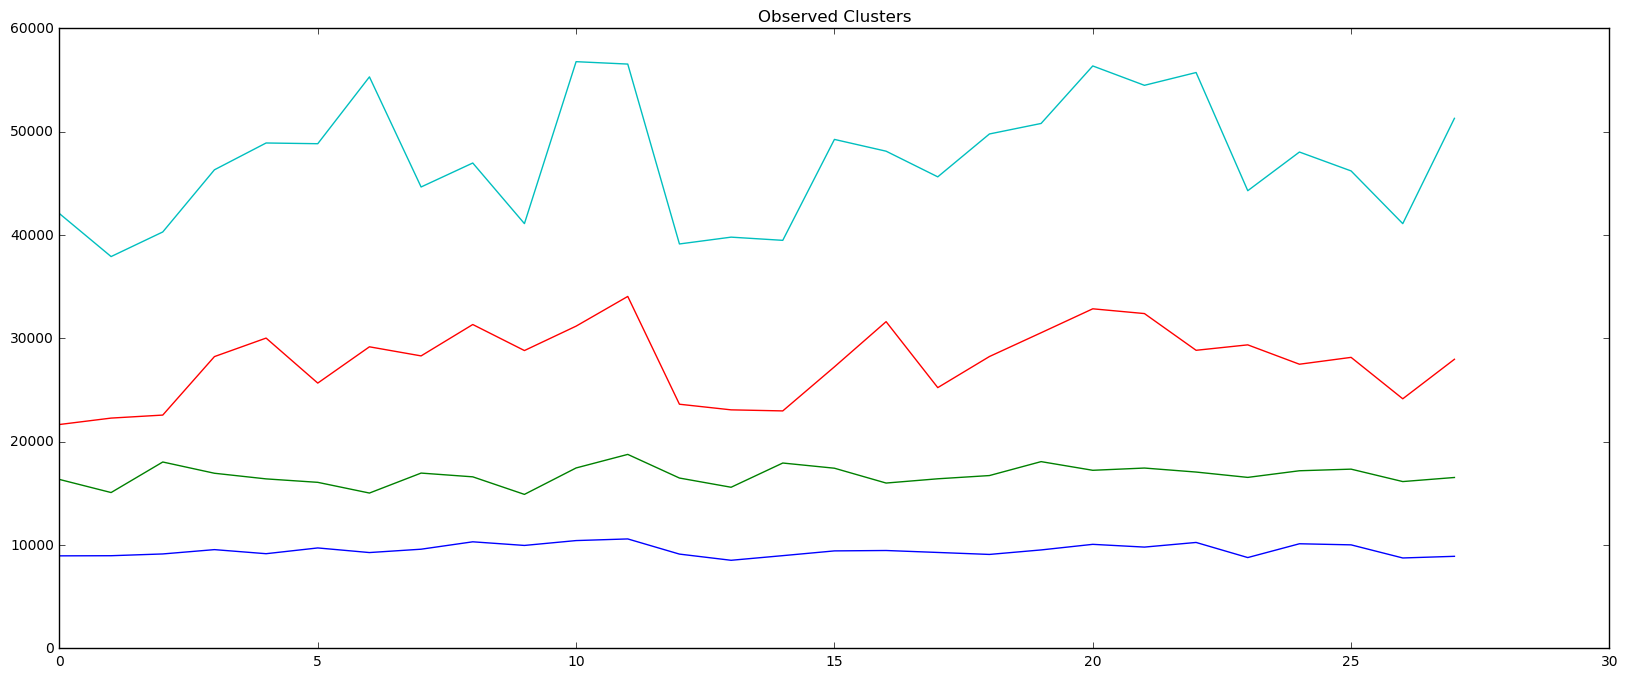

In [6]:
plt.close('all')

plt.figure(figsize=(20,8))
plt.title("Observed Clusters")
kmeans.cluster_centers_.sort(axis=0)
for i in kmeans.cluster_centers_:
    plt.plot(np.arange(28),i)
plt.show()




In [7]:

def return_prediction(X,y,model_array,kmeans):

    preds = []
    models = model_array+[]
    centroids = kmeans.predict(X)
    for i in range(len(X)):
        centroid = centroids[i]
        model = models[centroid]
        val = model.predict([X[i]])
        preds.append(val)


    preds = np.array(preds).reshape(y.shape)
    return preds





In [8]:
val = min(Counter(kmeans.predict(train_x)).values())

In [10]:

errors=[]

for k in range(1,val):
    models=[]
    for i in range(kmeans.n_clusters):
    
        centroids = kmeans.predict(train_x)
        indices = np.where(centroids==i,True,False)
        data_x = train_x[indices]
        data_y = train_y[indices]
        model = KNeighborsRegressor(n_neighbors=k,weights='distance')
        model.fit(data_x,data_y)
        models.append(model)
        model=None

    #print (train_cost,test_cost,v_cost,k)


    centers_1 = kmeans.cluster_centers_
    trainx_clusters = kmeans.predict(train_x)
    testx_clusters = kmeans.predict(test_x)
    
    kmeans.cluster_centers_.sort(axis=0)
    preds_train = return_prediction(train_x,train_y,models,kmeans)
    preds_test = return_prediction(test_x,test_y,models,kmeans)
    preds_val = return_prediction(v_x,v_y,models,kmeans)
    
    train_cost = relative_cost(train_y,preds_train)
    v_cost = relative_cost(v_y,preds_val)
    test_cost = relative_cost(test_y,preds_test)

    
    
    errors.append(v_cost)



In [11]:
k_min = 1+errors.index(min(errors))

In [12]:
min(errors)

1.099740685008873

In [13]:
models=[]
for i in range(kmeans.n_clusters):
    
    centroids = kmeans.predict(train_x)
    indices = np.where(centroids==i,True,False)
    data_x = train_x[indices]
    data_y = train_y[indices]
    model = KNeighborsRegressor(n_neighbors=k_min,weights='distance')
    model.fit(data_x,data_y)
    models.append(model)
    model=None



centers_1 = kmeans.cluster_centers_
trainx_clusters = kmeans.predict(train_x)
testx_clusters = kmeans.predict(test_x)

kmeans.cluster_centers_.sort(axis=0)
preds_train = return_prediction(train_x,train_y,models,kmeans)
preds_test = return_prediction(test_x,test_y,models,kmeans)
preds_val = return_prediction(v_x,v_y,models,kmeans)

train_cost = relative_cost(train_y,preds_train)
v_cost = relative_cost(v_y,preds_val)
test_cost = relative_cost(test_y,preds_test)


In [14]:
kmeans.cluster_centers_.sort(axis=0)
preds_train = return_prediction(train_x,train_y,models,kmeans)
preds_test = return_prediction(test_x,test_y,models,kmeans)
preds_val = return_prediction(v_x,v_y,models,kmeans)

In [15]:
train_cost = relative_cost(train_y,preds_train)
v_cost = relative_cost(v_y,preds_val)
test_cost = relative_cost(test_y,preds_test)

In [16]:
train_cost,test_cost,v_cost

(7.254310428966562e-05, 0.9176944452358404, 1.099740685008873)

In [18]:
train_cost = abs_error(train_y,preds_train)
v_cost = abs_error(v_y,preds_val)
test_cost = abs_error(test_y,preds_test)

In [19]:
train_cost,test_cost,v_cost

(0.11367499603913604, 400.17048786067863, 433.67580459310534)

In [76]:
centers_2 = kmeans.cluster_centers_
trainy_clusters = kmeans.predict(train_y)
testy_clusters = kmeans.predict(test_y)

In [77]:
Counter(kmeans.predict(test_y))

Counter({0: 8, 1: 13, 2: 4})

In [78]:
Counter(kmeans.predict(train_y))

Counter({0: 38, 1: 52, 2: 13, 3: 1})

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
#np.divide(confusion_matrix(trainx_clusters,trainy_clusters)*1.0,confusion_matrix(trainx_clusters,trainy_clusters).sum(axis=1).reshape((4,1)))


In [81]:
confusion_matrix(testx_clusters,testy_clusters)

array([[0, 7, 0, 0],
       [6, 6, 0, 0],
       [2, 0, 1, 0],
       [0, 0, 3, 0]])

In [82]:
train_x.shape

(104, 30)

In [83]:
78.0/104

0.75

In [84]:
test_x.shape

(25, 30)

In [85]:
import itertools
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_y)
perm_list = list(itertools.permutations(kmeans.cluster_centers_))
cnt=0

max_i = 0
prev_score = 0

for i in perm_list:
    
    kmeans.cluster_centers_ = np.array(i)
    trainy_clusters = kmeans.predict(train_y)
    testy_clusters = kmeans.predict(test_y)
    curr_score = np.trace(confusion_matrix(train_centroids,trainy_clusters))
    if curr_score>prev_score:
        max_i = cnt
        prev_score = max(curr_score,prev_score)
        req_centroids = i
    print (curr_score,cnt)
    cnt+=1

(14, 0)
(24, 1)
(1, 2)
(0, 3)
(12, 4)
(1, 5)
(63, 6)
(73, 7)
(58, 8)
(40, 9)
(69, 10)
(41, 11)
(22, 12)
(21, 13)
(30, 14)
(12, 15)
(17, 16)
(0, 17)
(33, 18)
(22, 19)
(41, 20)
(13, 21)
(17, 22)
(0, 23)


In [86]:
max_i

7

In [87]:
kmeans.cluster_centers_ = np.array(req_centroids)
testy_clusters = kmeans.predict(test_y)
curr_score = np.trace(confusion_matrix(test_centroids,testy_clusters))

In [88]:
confusion_matrix(test_centroids,testy_clusters)

array([[7, 0, 0, 0],
       [6, 6, 0, 0],
       [0, 2, 0, 1],
       [0, 0, 0, 3]])

In [89]:
kmeans.cluster_centers_.sort(axis=1)
testy_clusters = kmeans.predict(test_y)
curr_score = np.trace(confusion_matrix(test_centroids,testy_clusters))

In [90]:
confusion_matrix(test_centroids,testy_clusters)

array([[ 7,  0,  0,  0],
       [10,  2,  0,  0],
       [ 0,  3,  0,  0],
       [ 0,  0,  0,  3]])

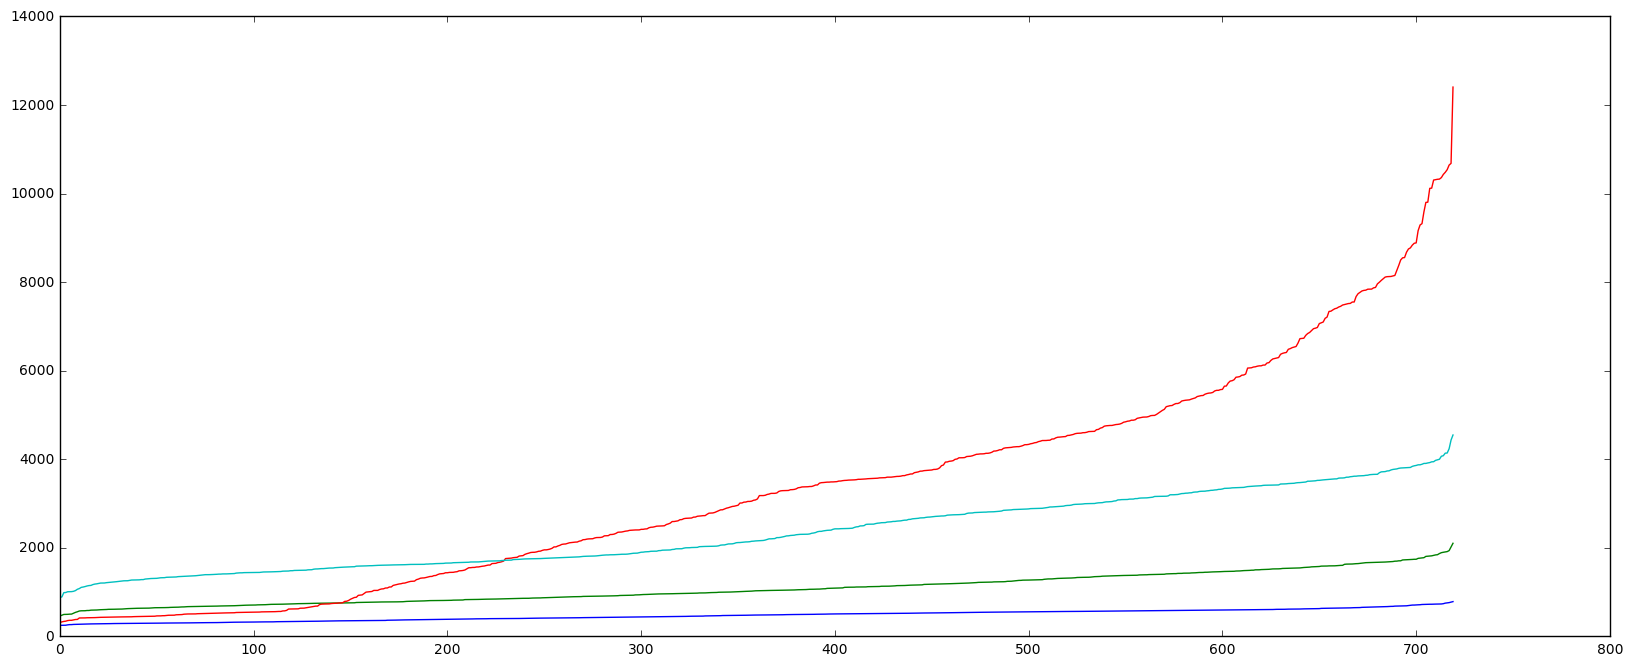

In [91]:
plt.close('all')
plt.figure(figsize=(20,8))
for i in kmeans.cluster_centers_:
    plt.plot(np.arange(720),i)
plt.show()

In [92]:
np.savetxt('results/kmeans_knearest.txt',(preds_test - test_y).flatten())

In [7]:
X.shape

(161, 30)

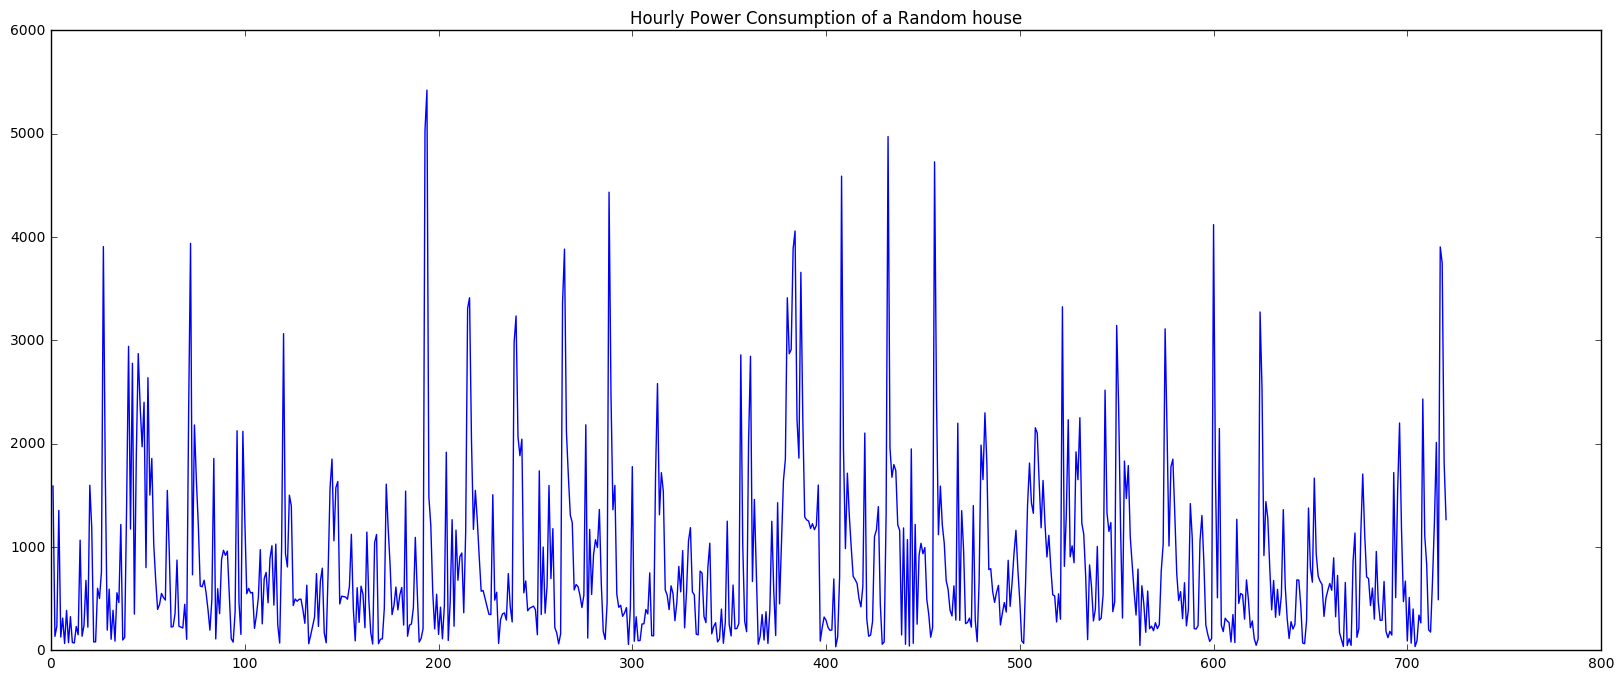

In [33]:
plt.close('all')
plt.figure(figsize=(20,8))
plt.plot(np.arange(1,721),v_y[0])
plt.title('Hourly Power Consumption of a Random house')
plt.show()